# ** Advances in Bioinformatics Project - Computational Drug Discovery Download Bioactivity Data** In fulfillment of the requirement for the Advances In BIoinformatics course

BY BENSON JOSHUA FRIDAY
MASTERS BIONFORMATICS
TOMSK STATE UNIVERSITY



In this Jupyter notebook, I will be building a real-life **Drug dicovery Bioinformatics Project.Particularly, I will be building a machine learning model using the ChEMBL bioactivity data.THE GOAL OF DRUG DISCOVERY IS TO FIND A COMPOUND OR MOLECULE THAT WILL BE ABLE TO INHIBIT/EFFECT THE FUNCTION OF A PROTEIN. This prediction can be initiated using Machine learning models.

The dataset(On SARS CORONAVIRUS 3clike protein ) used in this work were fetched from Chembl database





---

## **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications.


## **Installing libraries**

Install the ChEMBL web service package so that I can retrieve bioactivity data from the ChEMBL Database.

In [16]:
!pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.2 MB/s eta 0:00:00


## **Importing libraries**

In [17]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Searched for Target protein**

### **Target search for coronavirus**

In [18]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('coronavirus') #creating new target variable
targets = pd.DataFrame.from_dict(target_query)

targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


### **Selected and retrieved bioactivity data for *SARS coronavirus 3C-like proteinase* (seventh entry)**


I will assign the Seventh entry (which corresponds to the target protein, *coronavirus 3C-like proteinase*) to the ***selected_target*** variable

In [19]:
selected_target = targets.target_chembl_id[6]
selected_target


'CHEMBL3927'

In [20]:

activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

Here, I will retrieve only bioactivity data for *coronavirus 3C-like proteinase* (CHEMBL3927) that are reported as IC$_{50}$ values in nM (nanomolar) unit.

In [21]:
df = pd.DataFrame.from_dict(res)

In [22]:
df.head(3) #viewing first three rows of new dataframe

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


Saving the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [23]:
df.standard_type.unique() #doublechecking to ensure that only IC50 variant of standard type are listed

array(['IC50'], dtype=object)

In [24]:
df.to_csv('bioactivity_data_raw.csv', index=False)

## **Handling missing data**
Looked to drop compounds with missing value for the **standard_value**

In [25]:


df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


Apparently, For this dataset there is no missing data. But I used  the above code cell for bioactivity data of other target proteins.

## **Data pre-processing of the bioactivity data**

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. For Compounds with values of less than 1000 nM, they will be considered to be **active** while those greater than 10,000 nM will be assumed as **inactive**. Those  values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [26]:


bioactivity_class = []             #creating an empty list to store classification
for i in df2.standard_value:            #iterating over every element in dataframe to ascertain
  if float(i) >= 10000:                  #standard value classification according to aforementioned threshold
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  #else:
  #  bioactivity_class.append("intermediate")

In [27]:


df2.columns.unique()

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

### **Combined the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [28]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value'] #filtering only three selected columns
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0
...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0


In [29]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class') #converted List into panda series
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,inactive
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,inactive
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,active
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,active
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,inactive
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,NaN
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,NaN
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,NaN
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,NaN


Saves dataframe to CSV file

In [101]:
df4.to_csv('bioactivity_data_preprocessed.csv', index=False)


##  MOLECULAR DESCRIPTORS CALCULATIONS AND EXPLORATORY DATA ANALYSIS







## **Installed  rdkit**

In [31]:
!pip install rdkit
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

## **Loaded Bioactivity Data**



In [32]:

import pandas as pd

In [33]:

df = pd.read_csv('bioactivity_data_preprocessed.csv')

## **Calculating Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

## **IMPORTED LIBRARIES**

In [34]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

## **CALCULATED DESCRIPTORS**




In [35]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
#modified to fit the dataset


def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)             #converts SMILES string into molecule object
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0                                           #array to store lipinski descriptors
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)    #loop to calculate four descriptors for each molecule in moldata
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [36]:
df_lipinski = lipinski(df.canonical_smiles) #calling lipinski function to extract SMILES data

## **COMBINING DATAFRAMES-One with lipinski computed descriptors and original df with 	molecule_chembl_id $ SMILES**

In [37]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
128,338.359,3.40102,0.0,5.0
129,296.366,3.44330,0.0,3.0
130,276.291,4.09564,0.0,3.0
131,278.307,3.29102,0.0,3.0


In [38]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,inactive
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,inactive
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,active
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,active
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,inactive
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,NaN
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,NaN
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,NaN
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,NaN


In [39]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [40]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,inactive,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,inactive,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,active,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,active,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,inactive,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,NaN,338.359,3.40102,0.0,5.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,NaN,296.366,3.44330,0.0,3.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,NaN,276.291,4.09564,0.0,3.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,NaN,278.307,3.29102,0.0,3.0


### **Converted IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, I  converted **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accepted a DataFrame as input and :
* Took the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Took the molar value and apply -log10
* Deleted the ``standard_value`` column and created a new ``pIC50`` column

In [41]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    input = input.drop('standard_value_norm', axis=1)  # Use axis=1 to drop the column
    return input  # Return the modified DataFrame

## Point to note: Values greater than 100,000,000 are  fixed at 100,000,000 otherwise,the negative logarithmic value will become negative.

In [42]:
df_combined.standard_value.describe()

,standard_value
count,133.000000
mean,85967.130075
std,158897.319181
min,50.000000
25%,10100.000000
50%,17500.000000
75%,70000.000000
max,1000000.000000


In [43]:
-np.log10( (10**-9)* 100000000 )

1.0

In [44]:
np.log10( (10**-9)* 100000000 )

-1.0

In [45]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

I first applied the norm_value() function so that the values in the standard_value column is normalized.

In [46]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,inactive,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],inactive,338.344,3.53900,0.0,5.0,2000.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,NaN,338.359,3.40102,0.0,5.0,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,NaN,296.366,3.44330,0.0,3.0,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,NaN,276.291,4.09564,0.0,3.0,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,NaN,278.307,3.29102,0.0,3.0,10700.0


In [47]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,133.000000
mean,85967.130075
std,158897.319181
min,50.000000
25%,10100.000000
50%,17500.000000
75%,70000.000000
max,1000000.000000


In [48]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,inactive,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],inactive,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,NaN,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,NaN,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,NaN,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,NaN,278.307,3.29102,0.0,3.0,4.970616


##  **Converted the normalized standard values from nanomolar (nM) to molar (M) by multiplying each value by 10^-9
## This is done because pIC50 is typically expressed in molar units.
## Calculates the pIC50 value for each converted molar concentration using the formula:
##  pIC50 = −log_10(molar)

In [49]:
df_final.pIC50.describe()

,pIC50
count,133.000000
mean,4.718269
std,0.920910
min,3.000000
25%,4.154902
50%,4.756962
75%,4.995679
max,7.301030


### **Removed the 'intermediate' bioactivity class**
Here, I  removed the ``intermediate`` class from my  data set to allow simple comparison between the two bioactivity classes(active and Inactive).

In [50]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,inactive,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],inactive,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,NaN,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,NaN,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,NaN,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,NaN,278.307,3.29102,0.0,3.0,4.970616


## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

## Imported Libraries

In [51]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

## Frequency plot of Both Bioactivity classes

In [52]:
print(df_2class['bioactivity_class'].unique())

['inactive' 'active' nan]


<ipython-input-53-636976050847>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black', palette=palette)


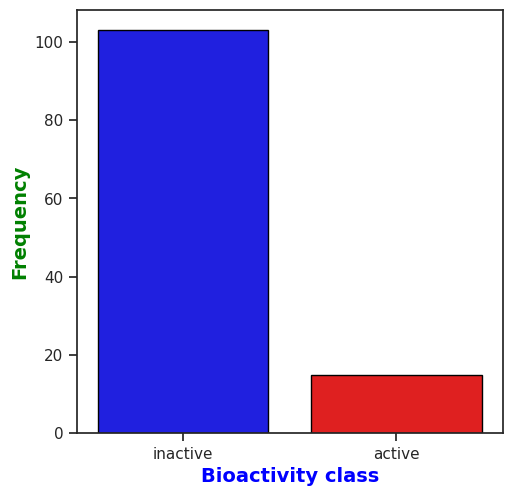

In [53]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(5.5, 5.5))

# Defined a custom palette based on  biactivity  class names
palette = {'active': 'red', 'inactive': 'blue'}  # Adjusted these keys to match bioactivity class names

# Created a count plot with the custom palette
sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black', palette=palette)

# Set x and y labels with specified colors
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='green')

# Saved the plot as a PDF file
plt.savefig('plot_bioactivity_class.pdf')
plt.show()   #Show the plot

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

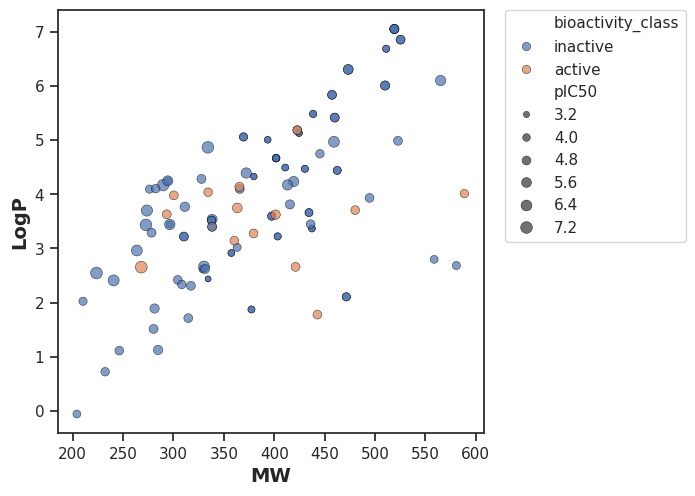

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

## **BOX PLOTS

## **pIC50 values**





<ipython-input-55-9ff291c376f4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class, palette=palette)


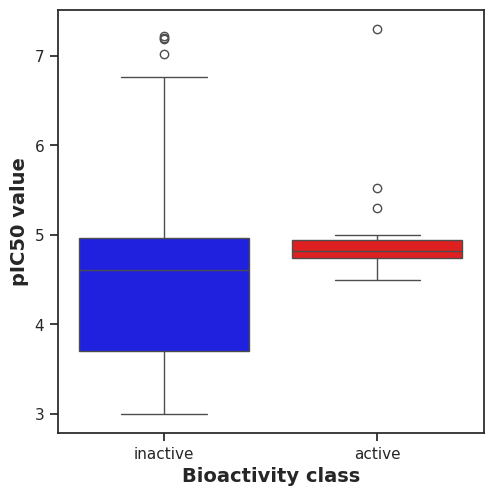

In [55]:





plt.figure(figsize=(5.5, 5.5))

#Defined custom palette for bioactivity classes
palette = {'active': 'red', 'inactive': 'blue'}

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class, palette=palette)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**









Null Hypothesis (H0): There is no significant difference in pIC50 values between the two bioactivity classes.





Alternative Hypothesis (H1): There is a significant difference in pIC50 values between the two bioactivity classes.

In [56]:

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives  Extracting data
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,              #create results dataframe
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [57]:
mannwhitney('pIC50')


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,987.5,0.083051,0.05,Same distribution (fail to reject H0)


## **MW**

<ipython-input-58-04d197ebbe9f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class, palette=palette)


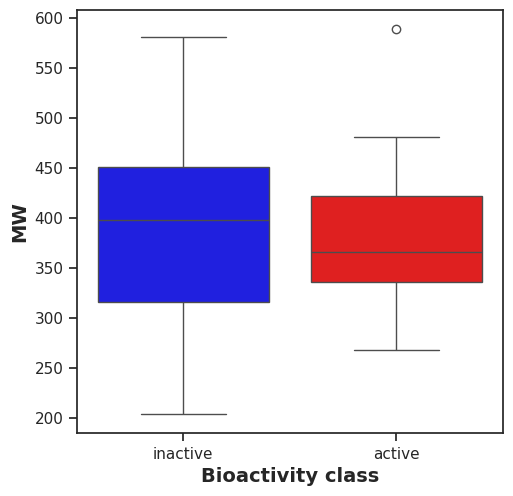

In [58]:
plt.figure(figsize=(5.5, 5.5))

palette = {'active': 'red', 'inactive': 'blue'}
sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class, palette=palette)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [59]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,732.0,0.746559,0.05,Same distribution (fail to reject H0)


## **LOGP**

<ipython-input-60-3ec6791eecb3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class, palette=palette)


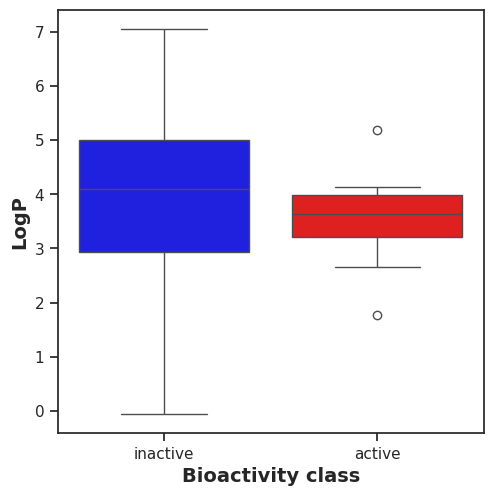

In [60]:
plt.figure(figsize=(5.5, 5.5))

palette = {'active': 'red', 'inactive': 'blue'}

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class, palette=palette)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

## **STATISTICAL ANALYSIS| MANN-WHITNEY TEST**:

In [61]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,620.0,0.219409,0.05,Same distribution (fail to reject H0)


## **NUMHDONORS**

<ipython-input-62-4ae1f1f99d14>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class, palette=palette)


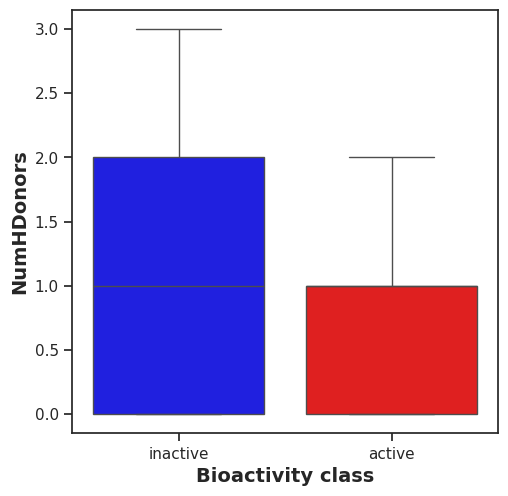

In [62]:
plt.figure(figsize=(5.5, 5.5))

palette = {'active': 'red', 'inactive': 'blue'}

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class, palette=palette)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

## **STATISTICAL ANALYSIS| MANN-WHITNEY TEST**:

In [63]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,664.5,0.359429,0.05,Same distribution (fail to reject H0)


## **NUMHACCEPTORS**

<ipython-input-64-1a90946c6ebc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class, palette=palette)


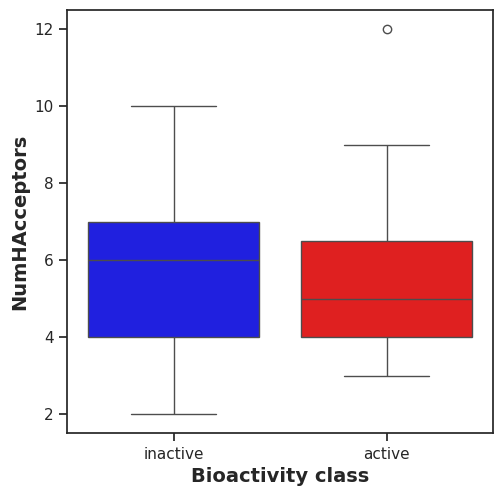

In [64]:
plt.figure(figsize=(5.5, 5.5))

palette = {'active': 'red', 'inactive': 'blue'}

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class, palette=palette)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [65]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,783.5,0.931495,0.05,Same distribution (fail to reject H0)


## **INTERPRETATION OF STATISTICAL RESULTS**

### In practical terms, The following is proposed about active and inactive compounds in the dataset
Similar Molecular Weight:
The p-value of 0.08 for molecular weight suggests that there is no significant difference in molecular weights between active and inactive compounds. This could imply that both classes generally adhere to the molecular weight guideline (under 500 Da) set by Lipinski’s rules, making them potentially suitable for oral bioavailability.

Comparable pIC50 Values:
A p-value of 0.07 for pIC50 indicates that there is also no significant difference in potency between the two classes based on this descriptor. This suggests that both active and inactive compounds may exhibit similar biological activities or potencies against their targets, which could be due to structural similarities.


LogP Values:
With a p-value of 0.2 for LogP, it indicates no significant difference in lipophilicity between active and inactive compounds. This suggests that both classes may have similar hydrophobic characteristics, which is important for membrane permeability and absorption.

Hydrogen Bonding Capacity:
The high p-values (0.9 for hydrogen acceptors and 0.35 for hydrogen donors) indicate that there are no significant differences in the number of hydrogen bond donors or acceptors between the two classes. This suggests that both active and inactive compounds have similar capacities for forming hydrogen bonds, which can influence solubility and permeability.

Given these results, I hypothesize that both active and inactive compounds may share similar physicochemical properties as dictated by Lipinski's rules, which could explain why they do not show significant differences in the Mann-Whitney U Test results across these descriptors.
However, despite having similar properties, the classification into active and inactive may depend on other factors such as:
Specific structural features not captured by these descriptors.
Variability in biological assays or target interactions.
The presence of other pharmacokinetic or pharmacodynamic properties influencing bioactivity.
In summary, while both classes appear to conform to Lipinski's guidelines based on the descriptors analyzed, further investigation into additional structural characteristics or biological mechanisms would be necessary to fully understand the differences in their bioactivity classifications.

In [66]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_MW.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 15%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: bioactivity_data_raw.csv (deflated 90%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: bioactivity_data_preprocessed.csv (deflated 80%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)


In [67]:
!pip install padelpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 24.9 MB/s eta 0:00:00


In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
pd.read_csv('/content/bioactivity_data_preprocessed.csv')

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,inactive
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,inactive
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,active
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,active
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,inactive
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,NaN
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,NaN
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,NaN
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,NaN


In [70]:
import pandas as pd

In [71]:
df_2class


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,inactive,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],inactive,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,NaN,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,NaN,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,NaN,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,NaN,278.307,3.29102,0.0,3.0,4.970616


In [72]:
selection = ['canonical_smiles','molecule_chembl_id']
df2_selection = df_2class[selection]
df2_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [73]:
! cat molecule.smi | head -5

Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21	CHEMBL187579
O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21	CHEMBL188487
O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21	CHEMBL185698
O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21	CHEMBL426082
O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]	CHEMBL187717


In [74]:

#determining entries in dataset
! cat molecule.smi | wc -l

133


## **Calculated fingerprint descriptors**


```



In [75]:

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-09-28 06:04:24--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-09-28 06:04:24--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   109MB/s    in 0.2s    

2024-09-28 06:04:25 (109 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-09-28 06:04:25--  https://github

In [76]:

! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [77]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


## COMPUTING PADEL


In [78]:
! bash padel.sh

Processing CHEMBL187579 in molecule.smi (1/133). 
Processing CHEMBL188487 in molecule.smi (2/133). 
Processing CHEMBL185698 in molecule.smi (3/133). Average speed: 3.94 s/mol.
Processing CHEMBL426082 in molecule.smi (4/133). Average speed: 2.17 s/mol.
Processing CHEMBL187717 in molecule.smi (5/133). Average speed: 1.81 s/mol.
Processing CHEMBL365134 in molecule.smi (6/133). Average speed: 1.45 s/mol.
Processing CHEMBL187598 in molecule.smi (7/133). Average speed: 1.30 s/mol.
Processing CHEMBL190743 in molecule.smi (8/133). Average speed: 1.12 s/mol.
Processing CHEMBL365469 in molecule.smi (9/133). Average speed: 1.03 s/mol.
Processing CHEMBL188983 in molecule.smi (10/133). Average speed: 0.95 s/mol.
Processing CHEMBL191575 in molecule.smi (11/133). Average speed: 0.90 s/mol.
Processing CHEMBL370923 in molecule.smi (12/133). Average speed: 0.84 s/mol.
Processing CHEMBL194398 in molecule.smi (13/133). Average speed: 0.79 s/mol.
Processing CHEMBL196635 in molecule.smi (14/133). Average sp

In [79]:
! ls -l

total 25768
-rw-r--r-- 1 root root    10177 Sep 28 06:03 bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root    68403 Sep 28 06:03 bioactivity_data_raw.csv
-rw-r--r-- 1 root root   247688 Sep 28 06:05 descriptors_output.csv
drwx------ 5 root root     4096 Sep 28 05:45 drive
drwxr-xr-x 3 root root     4096 Sep 28 06:04 __MACOSX
-rw-r--r-- 1 root root      122 Sep 28 06:04 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      119 Sep 28 06:04 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      130 Sep 28 06:04 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      128 Sep 28 06:04 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      123 Sep 28 06:04 mannwhitneyu_pIC50.csv
-rw-r--r-- 1 root root     7991 Sep 28 06:04 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Sep 28 06:04 padel.sh
-rw-r--r-- 1 root root 25768637 Sep 28 06:04 padel.zip
-rw-r--r-- 1 root root    14073 Sep 28 06:04 plot_bioactivity_class.pdf
-rw-r--r-- 1 roo

## **Preparing the X and Y Data Matrices**

## **X  DATA MATRIX**

In [80]:
df3_X = pd.read_csv('descriptors_output.csv')

In [81]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL187579,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL188487,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL185698,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL426082,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL187717,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,CHEMBL187460,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,CHEMBL363535,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131,CHEMBL227075,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
131,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y VARIABLE**
## ### **Converted IC50 to pIC50**

In [83]:
df3_Y = df_2class['pIC50']
df3_Y

,pIC50
0,5.142668
1,5.026872
2,4.869666
3,4.882397
4,5.698970
...,...
128,4.974694
129,4.995679
130,4.939302
131,4.970616


## **COMBINING X AND Y VARIABLES**

In [84]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.142668
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.026872
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.869666
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.882397
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.974694
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.995679
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.939302
131,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.970616


In [85]:
dataset3.to_csv('SARS_coronavirus_3C-like proteinase_biactivity_data_pIC50.csv')

 ## **MODEL BUILDING -REGRESSION MODEL WITH RANDOM FOREST**

##Imported Libraries

In [86]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
df = pd.read_csv('/content/SARS_coronavirus_3C-like proteinase_biactivity_data_pIC50.csv')

##INPUT FEATURES- SARS proteinase has 882 input variables and one output variable(pIC50 values)

In [89]:
X = df.drop('pIC50', axis=1)
X = df.drop(columns=['Unnamed: 0'])
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.142668
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.026872
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.869666
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.882397
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.974694
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.995679
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.939302
131,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.970616


In [90]:
 X.columns.unique()

Index(['PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3', 'PubchemFP4',
       'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8', 'PubchemFP9',
       ...
       'PubchemFP872', 'PubchemFP873', 'PubchemFP874', 'PubchemFP875',
       'PubchemFP876', 'PubchemFP877', 'PubchemFP878', 'PubchemFP879',
       'PubchemFP880', 'pIC50'],
      dtype='object', length=882)

In [91]:
Y = df.pIC50
Y

,pIC50
0,5.142668
1,5.026872
2,4.869666
3,4.882397
4,5.698970
...,...
128,4.974694
129,4.995679
130,4.939302
131,4.970616


### ***Examined  the data dimension***

In [92]:
X.shape

(133, 882)

In [93]:
Y.shape

(133,)

## **Data split (80/20 ratio)**

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [95]:
X_train.shape, Y_train.shape

((106, 882), (106,))

In [96]:
X_test.shape, Y_test.shape

((27, 882), (27,))

## **BUILT REGRESSION MODEL USING RANDOM FOREST**

In [97]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.9768226131350726

**In the context of bioactivity classification for SARS-CoV-2 proteins, an R-squared (R²) score of 0.97 indicates a very high level of predictive accuracy for the model used to classify compounds as either active or inactive against the virus.

Interpretation of R² Score in Bioactivity Classification
Variance Explained:
An R² score of 0.97 means that 97% of the variance in the bioactivity outcomes (active vs. inactive) can be explained by the features used in the model (such as chemical properties, structural features, etc.). This suggests that this model is highly effective at capturing the underlying relationships between the features and the bioactivity status of compounds.
Model Performance:
A high R² value indicates that this model fits the training data exceptionally well, meaning it can accurately predict which compounds are likely to be active against SARS-CoV-2 and which are not. In practical terms, this could translate to a high success rate in identifying potential antiviral candidates from a larger pool of compounds.
Implications for Drug Discovery:
In drug discovery, particularly for viral targets like SARS-CoV-2, having a model with an R² score of 0.97 is significant. It suggests that researchers can rely on this model to prioritize compounds for further testing, potentially reducing time and resources spent on ineffective candidates.
Contextual Considerations:
While a high R² score is promising, it’s important to consider other factors such as:

Overfitting: This model might perform well on training data but could fail on unseen data if it has learned noise rather than true patterns.
Validation: It’s essential to validate the model using independent datasets or cross-validation techniques to ensure its robustness.
Biological Relevance: The real-world applicability of predictions should be confirmed through experimental validation, as biological systems can be complex and may not always conform to statistical models.

Complementary Metrics:
Alongside R², other metrics such as accuracy, precision, recall, and F1-score should also be evaluated to get a comprehensive view of model performance, especially in classification tasks.

Conclusion
In summary, an R² score of 0.97 in the context of classifying bioactivity against SARS-CoV-2 indicates that the predictive model is highly effective at distinguishing between active and inactive compounds based on their chemical properties. This level of accuracy can significantly aid in drug discovery efforts by efficiently identifying promising candidates for further investigation. However, it is crucial to complement this analysis with additional validation methods and performance metrics to ensure reliable outcomes in real-world applications.

In [98]:
Y_pred = model.predict(X_test)

## **Scatter Plot of Experimental vs Predicted pIC50 Values**

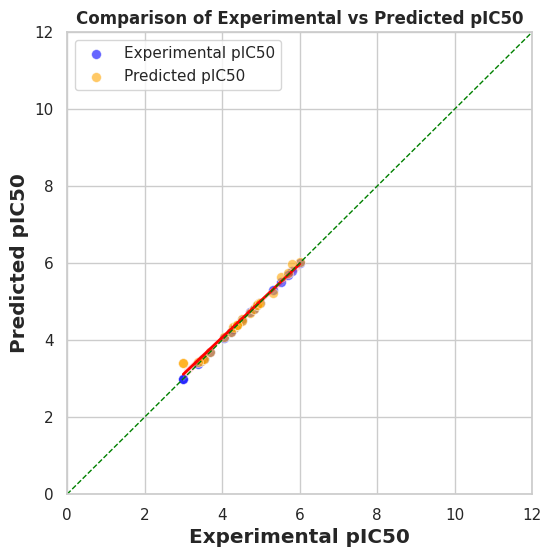

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("whitegrid") # Set visual style


plt.figure(figsize=(6, 6))  # Set figure size

# Scatter plot for experimental values
sns.scatterplot(x=Y_test, y=Y_test, color='blue', alpha=0.6, s=50, label='Experimental pIC50')

# Scatter plot for predicted values
sns.scatterplot(x=Y_test, y=Y_pred, color='orange', alpha=0.6, s=50, label='Predicted pIC50')

# Add a regression line for predicted values
sns.regplot(x=Y_test, y=Y_pred, scatter=False, line_kws={'color': 'red', 'lw': 2})  # No scatter points

# Set labels and title
plt.xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
plt.ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
plt.title('Comparison of Experimental vs Predicted pIC50', fontsize='medium', fontweight='bold')

# Set axis limits
plt.xlim(0, 12)
plt.ylim(0, 12)

plt.plot([0, 12], [0, 12], color='green', linestyle='--', lw=1)  # Reference line included

# Add grid for better readability
plt.grid(True)

# Add a legend to differentiate the plots
plt.legend()

plt.savefig('pIC50_comparison.pdf', format='pdf')
# Show the plot
plt.show()

In [100]:
! zip -r ALL_results.zip . -i *.csv *.pdf

  adding: plot_MW.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 15%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: bioactivity_data_raw.csv (deflated 90%)
  adding: descriptors_output.csv (deflated 95%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: bioactivity_data_preprocessed.csv (deflated 80%)
  adding: pIC50_comparison.pdf (deflated 31%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: SARS_coronavirus_3C-like proteinase_biactivity_data_pIC50.csv (deflated 94%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
